## Data Visualization (Checkpoint 2)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import graphviz 
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
df=pd.read_csv("titanic.csv") 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [4]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
df.survived.value_counts()

0.0    809
1.0    500
Name: survived, dtype: int64

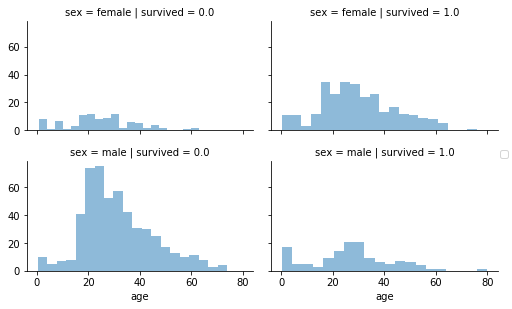

In [7]:
grid = sns.FacetGrid(df,col='survived', 
    row='sex', size=2.2, aspect=1.6)
grid.map(plt.hist,'age', alpha=.5, bins=20)
grid.add_legend()


We can Conclude from the plots ;that the females survivors are a lot more important than the male ones so we can say that the feature "sex" is very important in our model.
we can also say that the people around 20 to 40 are more likely to die wheras youngsters (around 1 to 10) say that the feature age is also important in our model.
The Age and the Sex are Correlated with the rate of surviving.


In [8]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

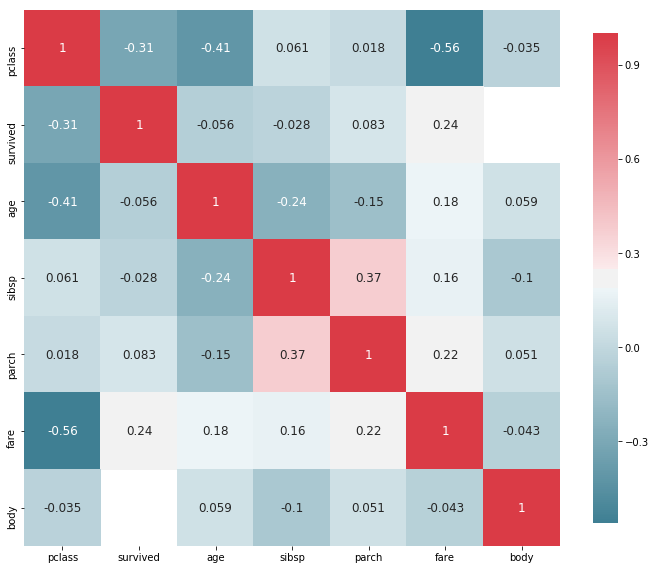

In [9]:
plot_correlation_map( df )

This function is a correlation Matrix; actually it represents the mutual relationship or association between the different parameters by calculating the correlation between each column and another we have in our data set . we can distinguish 3 types of Correlation : • A postivie correlation ; when the the correlation coefficient is closer to 1 and it does mean that they are very related so for exemple when one increases the other one does increase too so we do not have to study both . • A negative correlation ; when the correlation coefficient is closer to -1 and it does mean that they are opposites for exemple when one increases the other one decreases . • A neutral correlation ; when the correlation coefficient is closer to 0 and it does mean that the variables are not related so we have to study both. Correlation in this case can make working on data a lot easier by dropping some columns can also indicate the presence of a causal relationship and can be used as a basic quantity and foundation for many other modeling techniques.

Text(0,0.5,'Passenger Count')

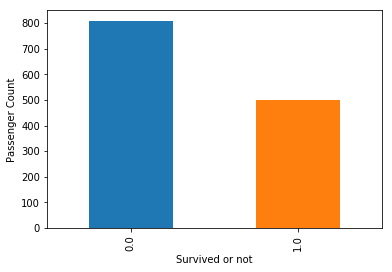

In [10]:
plt = df.survived.value_counts().plot('bar')
plt.set_xlabel('Survived or not')
plt.set_ylabel('Passenger Count')

Text(0,0.5,'Survival Probability')

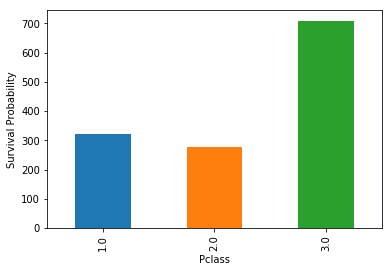

In [11]:
plt = df.pclass.value_counts().sort_index().plot('bar', title='')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

we Can see from the plot that the majority of survivors are from 3rd class.

In [12]:
df[['pclass', 'survived']].groupby('pclass').count()

,survived
pclass,
1.0,323
2.0,277
3.0,709


In [13]:
df= df[df['name'].notnull()]

In [14]:
df['titre']="a"

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
title=[]
df1=' '
for data in df['name']:
    
    df1=data.split(',')
    
    df1=df1[1].split('.')
    df2=df1[0].strip()
    print(df2)
    title.append(str(df2))
df['title']=title 
df.head()

Miss
Master
Miss
Mr
Mrs
Mr
Miss
Mr
Mrs
Mr
Col
Mrs
Mme
Miss
Mr
Mr
Mr
Mrs
Miss
Mr
Mr
Mrs
Mr
Miss
Miss
Mr
Mr
Mrs
Miss
Mr
Mr
Mr
Miss
Miss
Mr
Miss
Miss
Mr
Mr
Mr
Dr
Mrs
Mrs
Mrs
Miss
Major
Mr
Mr
Mrs
Mr
Mrs
Mr
Mr
Mr
Master
Miss
Mr
Mrs
Mr
Mrs
Mr
Mrs
Mr
Mrs
Mr
Mrs
Miss
Miss
Mr
Mrs
Mr
Mr
Mrs
Miss
Mr
Mr
Miss
Mr
Mrs
Mrs
Mr
Capt
Miss
Mrs
Mr
Mrs
Mr
Mr
Miss
Mr
Mrs
Mr
Mrs
Dr
Master
Mrs
Mr
Mrs
Mrs
Lady
Sir
Mr
Mrs
Miss
Miss
Miss
Mr
Mrs
Miss
Mr
Mr
Miss
Miss
Miss
Mr
Mr
Mrs
Miss
Mr
Dr
Mr
Mrs
Miss
Mr
Mrs
Mr
Mr
Mrs
Mr
Miss
Miss
Mrs
Mr
Mr
Mrs
Mr
Col
Miss
Mr
Mrs
Mr
Mrs
Mr
Mr
Mrs
Mr
Mrs
Mr
Mr
Mrs
Mr
Mr
Mr
Miss
Mr
Mrs
Mr
Mr
Mr
Miss
Mrs
Mrs
Mr
Mrs
Mr
Mr
Mr
Mrs
Miss
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mrs
Mr
Mrs
Mr
Miss
Dr
Miss
Mr
Mr
Mr
Mrs
Miss
Mrs
Mr
Miss
Mr
Miss
Miss
Mr
Miss
Mr
Mr
Mrs
Mlle
Mr
Mr
Mr
Mr
Mrs
Mr
Dr
Miss
Mrs
Mr
Mr
Mr
Mr
Miss
Miss
Mr
Miss
Mr
Dona
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mrs
Mr
Mrs
Miss
Major
Mr
Mrs
Jonkheer
Mr
Mr
Mr
Mrs
Mr
Mr
Mr
Miss
Mr
Mr
the Countess
Mr
Mrs
Mr
Master
Miss
Miss
Mr
Mrs
Mr
Mlle
Mr
Mrs
Miss
Mr
Mis

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,titre,title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",a,Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",a,Master
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",a,Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",a,Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",a,Mrs


In [16]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,titre,title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",a,Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",a,Master
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",a,Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",a,Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",a,Mrs


In [17]:
df = df.drop(columns=['ticket','cabin','name','fare'])

In [18]:
df.head()

,pclass,survived,sex,age,sibsp,parch,embarked,boat,body,home.dest,titre,title
0,1.0,1.0,female,29.0000,0.0,0.0,S,2,NaN,"St Louis, MO",a,Miss
1,1.0,1.0,male,0.9167,1.0,2.0,S,11,NaN,"Montreal, PQ / Chesterville, ON",a,Master
2,1.0,0.0,female,2.0000,1.0,2.0,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",a,Miss
3,1.0,0.0,male,30.0000,1.0,2.0,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",a,Mr
4,1.0,0.0,female,25.0000,1.0,2.0,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",a,Mrs


In [19]:
df[['title', 'survived']].groupby('title').count()

,survived
title,
Capt,1
Col,4
Don,1
Dona,1
Dr,8
Jonkheer,1
Lady,1
Major,2
Master,61


In [20]:
df['title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Jonkheer          1
Capt              1
Mme               1
Dona              1
the Countess      1
Sir               1
Lady              1
Don               1
Name: title, dtype: int64

Text(0,0.5,'Survival Probability')

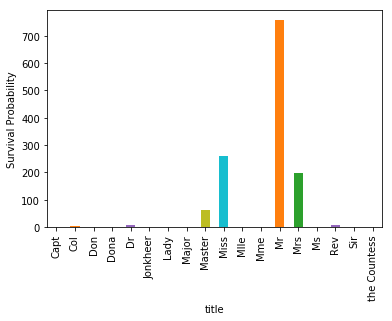

In [21]:
plt = df.title.value_counts().sort_index().plot('bar', title='')
plt.set_xlabel('title')
plt.set_ylabel('Survival Probability')

we Can conclude based on the plots that ' Mr' are more likely to die While 'Ms 'and Masters' for exemple are more likely to survive.So we can say that 'Title' is correlated with the rate of the survivors('survived') .

In [22]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty",
                   }

df['title'].str.strip()

0         Miss
1       Master
2         Miss
3           Mr
4          Mrs
5           Mr
6         Miss
7           Mr
8          Mrs
9           Mr
10         Col
11         Mrs
12         Mme
13        Miss
14          Mr
15          Mr
16          Mr
17         Mrs
18        Miss
19          Mr
20          Mr
21         Mrs
22          Mr
23        Miss
24        Miss
25          Mr
26          Mr
27         Mrs
28        Miss
29          Mr
         ...  
1279      Miss
1280        Mr
1281        Mr
1282        Mr
1283        Mr
1284        Mr
1285        Mr
1286       Mrs
1287        Mr
1288        Mr
1289        Mr
1290       Mrs
1291        Mr
1292        Mr
1293        Mr
1294        Mr
1295        Mr
1296        Mr
1297        Mr
1298        Mr
1299        Mr
1300       Mrs
1301        Mr
1302        Mr
1303        Mr
1304      Miss
1305      Miss
1306        Mr
1307        Mr
1308        Mr
Name: title, Length: 1309, dtype: object

In [23]:
df['title']=df['title'].map(Title_Dictionary)

In [24]:
df.head()

,pclass,survived,sex,age,sibsp,parch,embarked,boat,body,home.dest,titre,title
0,1.0,1.0,female,29.0000,0.0,0.0,S,2,NaN,"St Louis, MO",a,Miss
1,1.0,1.0,male,0.9167,1.0,2.0,S,11,NaN,"Montreal, PQ / Chesterville, ON",a,Master
2,1.0,0.0,female,2.0000,1.0,2.0,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",a,Miss
3,1.0,0.0,male,30.0000,1.0,2.0,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",a,Mr
4,1.0,0.0,female,25.0000,1.0,2.0,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",a,Mrs


In [25]:
df['title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: title, dtype: int64

Text(0,0.5,'Survival Probability')

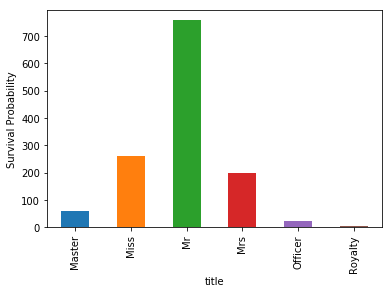

In [26]:
plt = df.title.value_counts().sort_index().plot('bar', title='')
plt.set_xlabel('title')
plt.set_ylabel('Survival Probability')

In [27]:
familysize=pd.DataFrame()
familysize['family']=df['parch']+df['sibsp']
familysize.head()

,family
0,0.0
1,3.0
2,3.0
3,3.0
4,3.0


In [28]:
df['Family']=familysize

In [29]:
df.isna().sum()

pclass          0
survived        0
sex             0
age           263
sibsp           0
parch           0
embarked        2
boat          823
body         1188
home.dest     564
titre           0
title           0
Family          0
dtype: int64

Text(0,0.5,'Survival Probability')

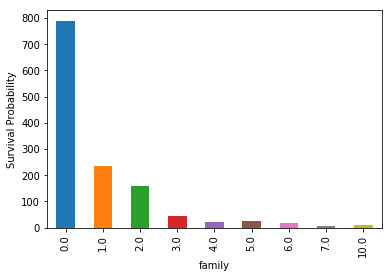

In [30]:
plt = df.Family.value_counts().sort_index().plot('bar', title='')
plt.set_xlabel('family')
plt.set_ylabel('Survival Probability')

we can conclude that the higher your family size is the more likely you're not going to die .

## Logistic Regression

In [31]:
df['sex']=df['sex'].map( {'male': 0, 'female': 1 }).astype(int)

In [32]:
df.head()

,pclass,survived,sex,age,sibsp,parch,embarked,boat,body,home.dest,titre,title,Family
0,1.0,1.0,1,29.0000,0.0,0.0,S,2,NaN,"St Louis, MO",a,Miss,0.0
1,1.0,1.0,0,0.9167,1.0,2.0,S,11,NaN,"Montreal, PQ / Chesterville, ON",a,Master,3.0
2,1.0,0.0,1,2.0000,1.0,2.0,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",a,Miss,3.0
3,1.0,0.0,0,30.0000,1.0,2.0,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",a,Mr,3.0
4,1.0,0.0,1,25.0000,1.0,2.0,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",a,Mrs,3.0


In [33]:
df['age']=df.fillna(df.mean())
df['sex']=df.fillna(df.max())
df['Family']=df.fillna(df.mean())

In [34]:
df.head()

,pclass,survived,sex,age,sibsp,parch,embarked,boat,body,home.dest,titre,title,Family
0,1.0,1.0,1,1,0.0,0.0,S,2,NaN,"St Louis, MO",a,Miss,1
1,1.0,1.0,1,1,1.0,2.0,S,11,NaN,"Montreal, PQ / Chesterville, ON",a,Master,1
2,1.0,0.0,1,1,1.0,2.0,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",a,Miss,1
3,1.0,0.0,1,1,1.0,2.0,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",a,Mr,1
4,1.0,0.0,1,1,1.0,2.0,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",a,Mrs,1


In [35]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['title']=encoder.fit_transform(df['title'])


In [36]:
features=['sex','age','Family','pclass','sibsp','parch','title']
x=df[features]
y=df['survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
logit1=LogisticRegression()

In [38]:
logit1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
logit1.score(x_test,y_test)

0.6793893129770993

In [40]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
confusion_matrix(logit1.predict(x),y)

array([[683, 286],
       [126, 214]], dtype=int64)

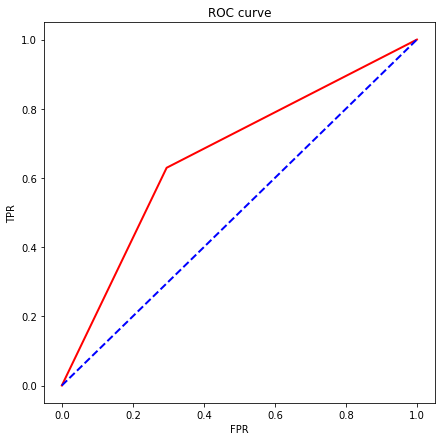

In [41]:
fpr, tpr,_=roc_curve(logit1.predict(x),y,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Decision Trees

In [42]:
from sklearn import tree
features=['sex','age','Family','sibsp','parch','title']
x=df[features]
y=df['survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)

In [43]:
dt_clf = tree.DecisionTreeClassifier(max_depth=10,random_state = 10)
dt_clf.fit(x_train, y_train)
results = dt_clf.predict(x_test)
print(metrics.accuracy_score(y_test, results))

0.7557251908396947


In [44]:
dt_clf =tree.DecisionTreeClassifier(criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=2,)
dt_clf.fit(x_train, y_train)
results = dt_clf.predict(x_test)
print(metrics.accuracy_score(y_test, results))

0.6793893129770993


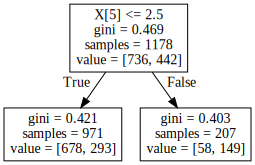

In [45]:
dot_data=tree.export_graphviz(dt_clf,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("data")
graph

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
random_grid = {'n_estimators': n_estimators,}


In [47]:
param_grid = {
    
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [48]:
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.1s finished


{'n_estimators': 300}

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
rf_clf = RandomForestClassifier(n_estimators=300)
rf_clf.fit(x_train,y_train)
y_predict=rf_clf.predict(x_test)
metrics.accuracy_score(y_test,y_predict)

0.7709923664122137